In [5]:
import pandas as pd # read csv, df manipulation
import matplotlib.pyplot as plt # plots 
import datetime as dt # Date time format
from plotly import graph_objs as go
from prophet import Prophet
import yfinance as yf

In [19]:
df = yf.download("AAPL").Close
df

[*********************100%***********************]  1 of 1 completed


Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2022-08-01    161.509995
2022-08-02    160.009995
2022-08-03    166.130005
2022-08-04    165.809998
2022-08-05    165.350006
Name: Close, Length: 10501, dtype: float64

In [20]:
# Create a Prophet model for model_dow
model_dow = Prophet(yearly_seasonality=True)
model_dow

In [21]:
# format 'dow_prophet_model' to fit the prophet functions parameters. 
dow_prophet_model = df.reset_index()
dow_prophet_model.columns = ['ds', 'y']
dow_prophet_model

,ds,y
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10496,2022-08-01,161.509995
10497,2022-08-02,160.009995
10498,2022-08-03,166.130005
10499,2022-08-04,165.809998


In [23]:
# Fit the Prophet model for dow data
model_dow.fit(dow_prophet_model)

15:01:28 - cmdstanpy - INFO - Chain [1] start processing
15:01:42 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Forecast one year of weekly future trends data for the Future dow Closing Prices 
future_dow = model_dow.make_future_dataframe(periods=52, freq="W")
future_dow

,ds
0,1980-12-12
1,1980-12-15
2,1980-12-16
3,1980-12-17
4,1980-12-18
...,...
10548,2023-07-02
10549,2023-07-09
10550,2023-07-16
10551,2023-07-23


In [80]:
# Make predictions for forecast_dow using the future_dow DataFrame
forecast_dow = model_dow.predict(future_dow).set_index('ds')
forecast_dow

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1980-12-12,0.129915,-11.650291,13.627540,0.129915,0.129915,0.315343,0.315343,0.315343,-0.075287,-0.075287,-0.075287,0.390630,0.390630,0.390630,0.0,0.0,0.0,0.445258
1980-12-15,0.130047,-11.886519,11.500874,0.130047,0.130047,0.445690,0.445690,0.445690,-0.007571,-0.007571,-0.007571,0.453261,0.453261,0.453261,0.0,0.0,0.0,0.575737
1980-12-16,0.130091,-11.414978,12.621210,0.130091,0.130091,0.515206,0.515206,0.515206,0.039902,0.039902,0.039902,0.475303,0.475303,0.475303,0.0,0.0,0.0,0.645296
1980-12-17,0.130134,-11.172307,14.051100,0.130134,0.130134,0.542676,0.542676,0.542676,0.045094,0.045094,0.045094,0.497582,0.497582,0.497582,0.0,0.0,0.0,0.672811
1980-12-18,0.130178,-12.427524,13.213451,0.130178,0.130178,0.517547,0.517547,0.517547,-0.002286,-0.002286,-0.002286,0.519833,0.519833,0.519833,0.0,0.0,0.0,0.647725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02,148.114837,134.952598,160.878913,147.379175,148.914810,-0.568242,-0.568242,-0.568242,0.000074,0.000074,0.000074,-0.568316,-0.568316,-0.568316,0.0,0.0,0.0,147.546595
2023-07-09,148.424012,133.662841,159.908054,147.649956,149.248359,-0.259708,-0.259708,-0.259708,0.000074,0.000074,0.000074,-0.259782,-0.259782,-0.259782,0.0,0.0,0.0,148.164304
2023-07-16,148.733188,136.274716,161.068486,147.918580,149.588955,0.056614,0.056614,0.056614,0.000074,0.000074,0.000074,0.056540,0.056540,0.056540,0.0,0.0,0.0,148.789801


In [81]:
# Plot predictions for our forecast_dow DataFrame for the 52 week period 
forecast_dow_predictions = forecast_dow[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:]
forecast_dow_predictions

,yhat,yhat_lower,yhat_upper
ds,,,
2022-08-07,133.801909,120.904475,146.256247
2022-08-14,134.126444,120.767255,146.411631
2022-08-21,134.546410,122.327078,148.164704
2022-08-28,134.975208,122.138123,147.596067
2022-09-04,135.283236,122.396427,147.993362
2022-09-11,135.415015,122.335520,147.532142
2022-09-18,135.448769,122.488036,147.480822
2022-09-25,135.542914,122.831672,147.700779
2022-10-02,135.810933,123.253112,149.430256


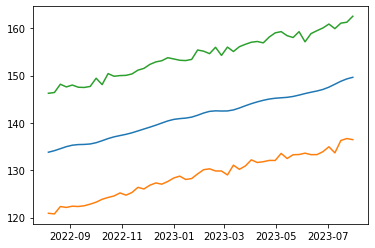

In [83]:
fig, ax = plt.subplots()
ax.plot(forecast_dow_predictions)

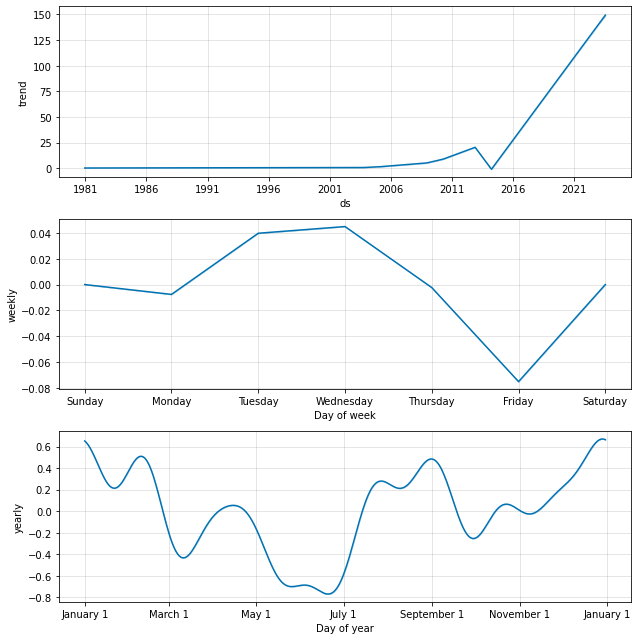

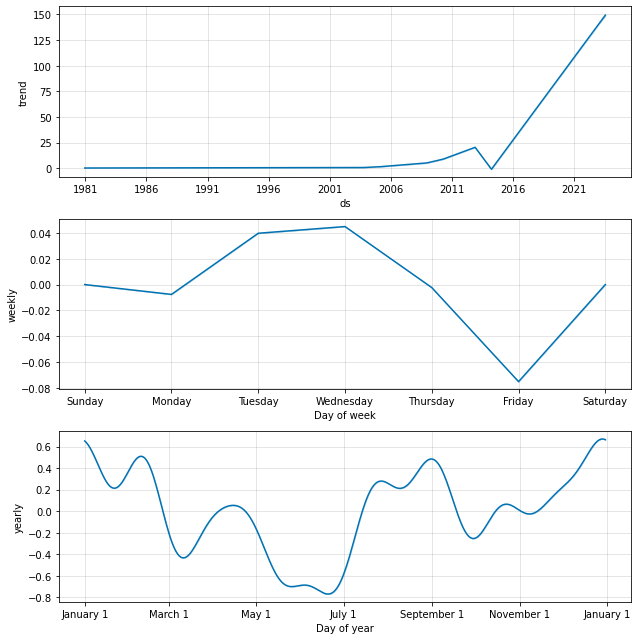

In [27]:
# Use the plot_components function to visualize the forecast results 
figures = model_dow.plot_components(forecast_dow)
figures

In [76]:
# Create a `forecast_future_month` Dataframe, which contains just forecasts for the future
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat

end = pd.to_datetime('today').strftime('%Y-%m-%d')
time_delta = dt.timedelta(days = 20)
start = (pd.to_datetime(end) - time_delta).strftime('%Y-%m-%d')
start = pd.to_datetime(start)
end = pd.to_datetime(end)

In [77]:
forecast_dow

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-12,0.129915,-12.329228,13.162351,0.129915,0.129915,0.315343,0.315343,0.315343,-0.075287,-0.075287,-0.075287,0.390630,0.390630,0.390630,0.0,0.0,0.0,0.445258
1,1980-12-15,0.130047,-11.530041,13.092607,0.130047,0.130047,0.445690,0.445690,0.445690,-0.007571,-0.007571,-0.007571,0.453261,0.453261,0.453261,0.0,0.0,0.0,0.575737
2,1980-12-16,0.130091,-11.596652,13.190088,0.130091,0.130091,0.515206,0.515206,0.515206,0.039902,0.039902,0.039902,0.475303,0.475303,0.475303,0.0,0.0,0.0,0.645296
3,1980-12-17,0.130134,-12.156284,12.727200,0.130134,0.130134,0.542676,0.542676,0.542676,0.045094,0.045094,0.045094,0.497582,0.497582,0.497582,0.0,0.0,0.0,0.672811
4,1980-12-18,0.130178,-11.579598,13.579311,0.130178,0.130178,0.517547,0.517547,0.517547,-0.002286,-0.002286,-0.002286,0.519833,0.519833,0.519833,0.0,0.0,0.0,0.647725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10548,2023-07-02,148.114837,134.405306,159.101084,147.129423,148.969403,-0.568242,-0.568242,-0.568242,0.000074,0.000074,0.000074,-0.568316,-0.568316,-0.568316,0.0,0.0,0.0,147.546595
10549,2023-07-09,148.424012,135.281468,160.217472,147.402670,149.313591,-0.259708,-0.259708,-0.259708,0.000074,0.000074,0.000074,-0.259782,-0.259782,-0.259782,0.0,0.0,0.0,148.164304
10550,2023-07-16,148.733188,135.606248,160.557953,147.676376,149.649327,0.056614,0.056614,0.056614,0.000074,0.000074,0.000074,0.056540,0.056540,0.056540,0.0,0.0,0.0,148.789801
10551,2023-07-23,149.042363,137.591318,161.887233,147.956271,150.014104,0.246483,0.246483,0.246483,0.000074,0.000074,0.000074,0.246409,0.246409,0.246409,0.0,0.0,0.0,149.288845


In [72]:
forecast_dow[forecast_dow['ds'] == start]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [79]:
forecast_future_month = test.loc[start:end][["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_future_month = forecast_future_month.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case", 
        "yhat": "Most Likely Case"
    }
)

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [50]:
forecast_dow?

In [48]:
forecast_future_month

NameError: name 'forecast_future_month' is not defined